In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from windrose import WindroseAxes
from windrose import plot_windrose
import matplotlib.cm as cm
from PIL import Image
import time
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re
from fbprophet import Prophet
import math



df = pd.read_csv('preprocessed_data_15_weeks.csv')
df.ds= pd.to_datetime(df.ds)

In [2]:
df.head()

,ds,dan,temp,r_hum,co_2,aqi_i,temp_e,r_hum_e,press,wind_s,wind_a,aqi_e
0,2020-12-28 01:00:00,1.0,26.262567,40.976413,728.598900,67.941840,2.410,100.000000,998.0,7.200000,130.0,60.666667
1,2020-12-28 02:00:00,1.0,25.984767,40.775907,675.325533,65.810073,2.890,100.000000,998.0,4.600000,120.0,52.000000
2,2020-12-28 03:00:00,1.0,25.831253,40.658130,659.029267,64.538170,2.885,96.500000,999.0,5.400000,155.0,40.333333
3,2020-12-28 04:00:00,1.0,25.716143,40.527917,642.445900,64.224107,4.110,90.666667,999.0,7.700000,150.0,21.000000
4,2020-12-28 05:00:00,1.0,25.571363,40.354333,638.112600,64.128677,5.000,84.000000,999.0,5.633333,100.0,11.666667


In [3]:
#a_hum=(6.112*r_hum*math.exp((17.62*temp)/(243.12+temp)))/(461.5*(temp+273.15))
#df['a_hum'] = df.apply(lambda row: (6.112*row['r_hum']*math.exp((17.62*row['temp'])/(243.12+row['temp'])))/(461.5*(row['temp']+273.15)))
a_hum = []
counter = 0
for row in range(len(df['r_hum'])):
    ah=(6.112*df['r_hum'][row]*math.exp((17.62*df['temp'][row])/(243.12+df['temp'][row])))/(461.5*(df['temp'][row]+273.15))
    a_hum.append(ah)
df['a_hum']=a_hum
df.head()
co2 = df[['ds','co_2','a_hum']].copy()

In [4]:
plt.rcParams['figure.figsize']=[16,8]
plt.rcParams.update({'font.size':14})

In [5]:
co2.resample('H', on='ds').co_2.mean()
co2.resample('H', on='ds').a_hum.mean()
co2.head(24)

,ds,co_2,a_hum
0,2020-12-28 01:00:00,728.598900,0.010100
1,2020-12-28 02:00:00,675.325533,0.009896
2,2020-12-28 03:00:00,659.029267,0.009783
3,2020-12-28 04:00:00,642.445900,0.009689
4,2020-12-28 05:00:00,638.112600,0.009570
5,2020-12-28 06:00:00,747.356633,0.009592
6,2020-12-28 07:00:00,1245.112667,0.010335
7,2020-12-28 08:00:00,1551.060000,0.010875
8,2020-12-28 09:00:00,609.522567,0.009800
9,2020-12-28 10:00:00,490.182200,0.009391


In [6]:
ach1 = co2.a_hum[0:5]
ach2 = co2.a_hum[21:23]
ach = ach2.append(ach1)
print(ach)

21    0.011716
22    0.010687
0     0.010100
1     0.009896
2     0.009783
3     0.009689
4     0.009570
Name: a_hum, dtype: float64


In [7]:
ach = co2.co_2[0:4]
print(ach)

0    728.598900
1    675.325533
2    659.029267
3    642.445900
Name: co_2, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


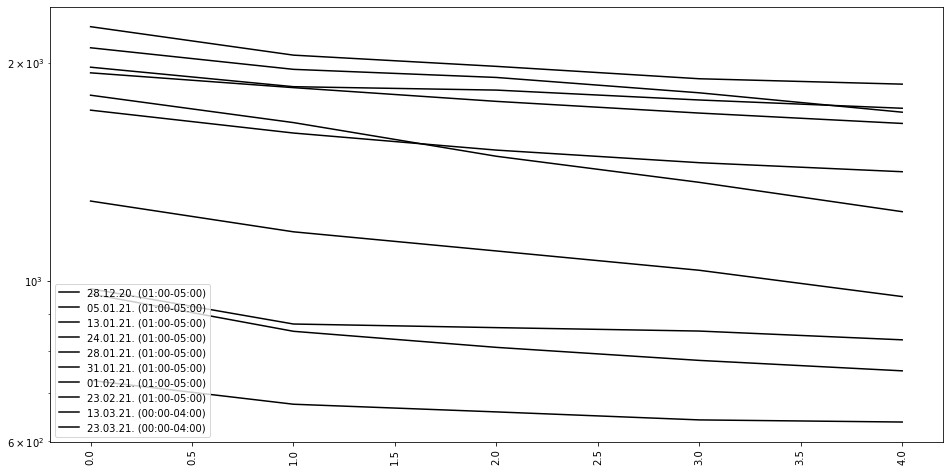

In [8]:
plt.rcParams['figure.figsize']=[16,8]
plt.rcParams.update({'font.size':10})
plt.yscale('log')
#plt.plot(co2.ds[500:600],co2.a_hum[500:600],color='c',LineWidth=1.5,label='water vapour')
#plt.plot(co2['ds'][776:782],co2.co_2[776:782],color='k',LineWidth=1.5,label='CO2')
plt.plot(np.arange(len(co2['ds'][0:5])),co2.co_2[0:5],color='k',LineWidth=1.5,label='28.12.20. (01:00-05:00)')
plt.plot(np.arange(len(co2['ds'][201:206])),co2.co_2[201:206],color='k',LineWidth=1.5,label='05.01.21. (01:00-05:00)')
plt.plot(np.arange(len(co2['ds'][393:398])),co2.co_2[393:398],color='k',LineWidth=1.5,label='13.01.21. (01:00-05:00)')
plt.plot(np.arange(len(co2['ds'][633:638])),co2.co_2[633:638],color='k',LineWidth=1.5,label='24.01.21. (01:00-05:00)')
plt.plot(np.arange(len(co2['ds'][729:734])),co2.co_2[729:734],color='k',LineWidth=1.5,label='28.01.21. (01:00-05:00)')
plt.plot(np.arange(len(co2['ds'][801:806])),co2.co_2[801:806],color='k',LineWidth=1.5,label='31.01.21. (01:00-05:00)')
plt.plot(np.arange(len(co2['ds'][825:830])),co2.co_2[825:830],color='k',LineWidth=1.5,label='01.02.21. (01:00-05:00)')
plt.plot(np.arange(len(co2['ds'][1324:1329])),co2.co_2[1324:1329],color='k',LineWidth=1.5,label='23.02.21. (01:00-05:00)')
plt.plot(np.arange(len(co2['ds'][1741:1746])),co2.co_2[1741:1746],color='k',LineWidth=1.5,label='13.03.21. (00:00-04:00)')
plt.plot(np.arange(len(co2['ds'][1980:1985])),co2.co_2[1980:1985],color='k',LineWidth=1.5,label='23.03.21. (00:00-04:00)')

#fit = np.polyfit(np.arange(co2['ds'][776:782].size), np.log(co2.co_2[776:782]), 1)
#fit_function = np.poly1d(fit)

#plt.plot(co2['ds'][776:782], fit_function(np.arange(co2['ds'][776:782].size)), color='r',LineWidth=2,label='CO2 fit')
#plt.plot(df['epoch_t'],df['temp_clean'],color='c',LineWidth=1.5,label='T_simplified')
#plt.xlim(df['epoch_t'][0],df['epoch_t'][-1])
plt.xticks(rotation=90)
plt.legend()

In [9]:
selected_slopes = []
x = np.arange(co2['ds'][0:5].size)
fit = np.polyfit(x, np.log(co2['co_2'][0:5]), deg=1)
selected_slopes.append(fit[0])
x = np.arange(co2['ds'][0:5].size)
fit = np.polyfit(x, np.log(co2['co_2'][201:206]), deg=1)
selected_slopes.append(fit[0])
x = np.arange(co2['ds'][0:5].size)
fit = np.polyfit(x, np.log(co2['co_2'][393:398]), deg=1)
selected_slopes.append(fit[0])
fit = np.polyfit(x, np.log(co2['co_2'][633:638]), deg=1)
selected_slopes.append(fit[0])
fit = np.polyfit(x, np.log(co2['co_2'][729:734]), deg=1)
selected_slopes.append(fit[0])
fit = np.polyfit(x, np.log(co2['co_2'][801:806]), deg=1)
selected_slopes.append(fit[0])
fit = np.polyfit(x, np.log(co2['co_2'][825:830]), deg=1)
selected_slopes.append(fit[0])
fit = np.polyfit(x, np.log(co2['co_2'][1324:1329]), deg=1)
selected_slopes.append(fit[0])
fit = np.polyfit(x, np.log(co2['co_2'][1741:1746]), deg=1)
selected_slopes.append(fit[0])
fit = np.polyfit(x, np.log(co2['co_2'][1980:1985]), deg=1)
selected_slopes.append(fit[0])
print(max(selected_slopes))
print(sum(selected_slopes)/len(selected_slopes))
print(min(selected_slopes))

-0.030383297388262818
-0.050274280117774725
-0.09319067231668776


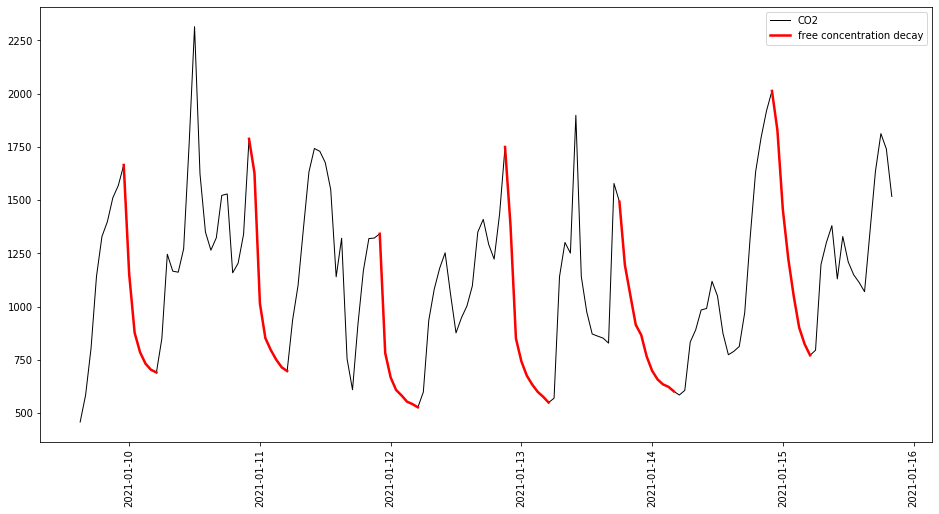

In [29]:
#plt.rcParams['figure.figsize']=[16,8]
#plt.rcParams.update({'font.size':10})
#plt.yscale('log', subsy=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
plt.plot(co2['ds'][300:450],co2['co_2'][300:450],color='k',LineWidth=1,label='CO2')
plt.plot(co2['ds'][331:339],co2['co_2'][331:339],color='r',LineWidth=2.5,label='free concentration decay')
plt.plot(co2['ds'][308:315],co2['co_2'][308:315],color='r',LineWidth=2.5)
plt.plot(co2['ds'][355:363],co2['co_2'][355:363],color='r',LineWidth=2.5)
plt.plot(co2['ds'][378:387],co2['co_2'][378:387],color='r',LineWidth=2.5)
#plt.plot(co2['ds'][391:398],co2['co_2'][391:398],color='r',LineWidth=2.5,label='CO2')
plt.plot(co2['ds'][399:410],co2['co_2'][399:410],color='r',LineWidth=2.5)
plt.plot(co2['ds'][427:435],co2['co_2'][427:435],color='r',LineWidth=2.5)
plt.xticks(rotation=90)
plt.legend()

In [261]:
avg_slope = []
slope, intercept = np.polyfit(range(8), np.log(co2.co_2[331:339]), 1)
avg_slope.append(slope)
slope, intercept = np.polyfit(range(7), np.log(co2.co_2[308:315]), 1)
avg_slope.append(slope)
slope, intercept = np.polyfit(range(8), np.log(co2.co_2[355:363]), 1)
avg_slope.append(slope)
slope, intercept = np.polyfit(range(9), np.log(co2.co_2[378:387]), 1)
avg_slope.append(slope)
slope, intercept = np.polyfit(range(11), np.log(co2.co_2[399:410]), 1)
avg_slope.append(slope)
slope, intercept = np.polyfit(range(8), np.log(co2.co_2[427:435]), 1)
avg_slope.append(slope)
print(sum(avg_slope)/len(avg_slope))
print(max(avg_slope))
print(min(avg_slope))
print(avg_slope)

-0.12494366754530772
-0.08665594149419549
-0.14626054394351257
[-0.13892109480910383, -0.1359144727460489, -0.10680099099806331, -0.1351089612809222, -0.08665594149419549, -0.14626054394351257]


In [198]:
ach = []
for i in range(len(co2)):
    #ach_list.append(co2.co_2[(0+24*i):(5+24*i)])
    try:
        slope, intercept = np.polyfit(range(len(co2.co_2[(1+23*i):(3+23*i)])), np.log(co2.co_2[(1+24*i):(3+24*i)]), 1)
        if slope < 0:
            ach.append(abs(slope))
        else: continue
    except: break
    #print(slope)
print(sum(ach)/len(ach))
print(max(ach))
print(min(ach))

0.0773706586631485
0.3929040997843982
0.005338430550595241


In [199]:
ach = []
for i in range(len(co2)):
    #ach_list.append(co2.co_2[(0+24*i):(5+24*i)])
    try:
        slope, intercept = np.polyfit(range(len(co2.a_hum[(1+23*i):(3+23*i)])), np.log(co2.a_hum[(1+24*i):(3+24*i)]), 1)
        if slope < 0:
            ach.append(abs(slope))
        else: continue
    except: break
    #print(slope)
print(sum(ach)/len(ach))
print(max(ach))
print(min(ach))

0.01590187890593103
0.08845999605592247
0.0013521934375342326


In [29]:
slope, intercept = np.polyfit(range(2), np.log(co2.co_2[501:503]), 1)
print(slope)

-0.23205240634818391


In [44]:
slope, intercept = np.polyfit(range(6), np.log(co2.co_2[776:782]), 1)
print(slope)

-0.08737269760894574
